In [39]:
import imblearn
import collections
from numpy import mean
from numpy import std
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.combine import SMOTEENN
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#--
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_multilabel_classification
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
from sklearn.inspection import permutation_importance


# for plotting
import matplotlib.pyplot as plt
# to divide train and test set
from sklearn.model_selection import train_test_split
# feature scaling
from sklearn.preprocessing import MinMaxScaler
#to buid models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# models for Stacking
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
# to evaluate the model
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error,r2_score
import math
#to find training time of the model
import time
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.simplefilter(action='ignore')
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [40]:
df = pd.read_csv("covidweather.csv")
df = df.drop(columns = ['Date', 'County', 'State', 'Deaths', 'New Cases', 'Cases'])
df

,Population,Lat,Long,temp,humidity,windspeed,New Deaths,Age-65,Income-PC
0,658573,33.555547,-86.895063,12.5,44.47,28.8,0,16.3,32098
1,658573,33.555547,-86.895063,14.4,85.83,19.0,0,16.3,32098
2,658573,33.555547,-86.895063,18.8,82.40,24.0,0,16.3,32098
3,658573,33.555547,-86.895063,13.3,90.78,14.5,0,16.3,32098
4,658573,33.555547,-86.895063,11.1,89.99,19.4,0,16.3,32098
...,...,...,...,...,...,...,...,...,...
35035,99500,41.307025,-104.688750,-13.2,68.00,26.9,0,16.5,35190
35036,99500,41.307025,-104.688750,-10.6,65.60,21.5,0,16.5,35190
35037,99500,41.307025,-104.688750,-6.9,45.00,22.6,0,16.5,35190
35038,99500,41.307025,-104.688750,2.5,27.10,37.1,0,16.5,35190


In [41]:

#Training & Test set--------------------------------
y = df['New Deaths']

# x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

print("Features:", len(df.columns))
print("Records:", len(df))

Features: 9
Records: 35040


In [42]:
#Testing and Training
#splits into setssss
#split into train and test
x = df
x_train, x_test_yield, y_train, y_test = train_test_split(x, y, train_size = 0.9, random_state = 42)

#split into train and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.75, random_state = 42)

#to add to csv later
x_test_yield2 = x_test_yield.reset_index(drop=True)

#specify x_train and test (drop Actual Yield)
x_test = x_test_yield.drop(columns = ['New Deaths'])
# x_test.reset_index(drop=True)
x_train = x_train.drop(columns = ['New Deaths'])

x_val = x_val.drop(columns = ['New Deaths'])
#Normalize
# scaler = Normalizer()
# x_train = scaler.fit_transform(x_train)
# x_val = scaler.transform(x_val)
# x_test = scaler.transform(x_test)

#Scale
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

print("Features:", len(df.columns))
print("Training set:", len(x_train))
print("Validation:", len(x_val))
print("Test:", len(x_test))

Features: 9
Training set: 23652
Validation: 7884
Test: 3504


In [43]:
max_features = [1,5, 10, 20, 30, 40]
max_depth = [1,5,10,15]
min_samples_split = [2,6,8,10]
estimators = [100, 1000, 1500, 2000]
bootstrap = [True, False]
randomstate = [0,1,2,3,42 ]

mylist = []    
for n in estimators:
    for mss in min_samples_split:
#         for m in max_features:
            for md in max_depth:
                for bs in bootstrap:
                    for rs in randomstate:

                        model = RandomForestRegressor(max_depth = md, min_samples_split = mss, bootstrap =bs, n_estimators = n, random_state = rs)

                        # define the stacking ensemble
                        #model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
                        model.fit(x_train, y_train)
                        y_pred_val = model.predict(x_val)
                        y_pred_train = model.predict(x_train)
                        modelscore = model.score(x_test, y_test)
                        mseval = mean_squared_error(y_val, y_pred_val)
                        msetrain = mean_squared_error(y_train, y_pred_train)
                        print('n_estimators:', n, 'MSS:', mss, 'Max Depth', md, 'Bootstrap:', bs, 'Random State', rs, "MSE Train:", msetrain, 'MSE VAL:', mseval)
                        mylist.append(mseval)
print("Lowest MSE", min(mylist))

n_estimators: 100 MSS: 2 Max Depth 1 Bootstrap: True Random State 0 MSE Train: 204.81289705843503 MSE VAL: 1477.8403578449845
n_estimators: 100 MSS: 2 Max Depth 1 Bootstrap: True Random State 1 MSE Train: 205.04052338858472 MSE VAL: 1479.716029050607
n_estimators: 100 MSS: 2 Max Depth 1 Bootstrap: True Random State 2 MSE Train: 204.02717384252105 MSE VAL: 1478.3225641957042
n_estimators: 100 MSS: 2 Max Depth 1 Bootstrap: True Random State 3 MSE Train: 205.22867585206842 MSE VAL: 1479.7052850432092
n_estimators: 100 MSS: 2 Max Depth 1 Bootstrap: True Random State 42 MSE Train: 204.7868120764925 MSE VAL: 1479.8914931273994
n_estimators: 100 MSS: 2 Max Depth 1 Bootstrap: False Random State 0 MSE Train: 208.98906320342954 MSE VAL: 1494.0287877671612
n_estimators: 100 MSS: 2 Max Depth 1 Bootstrap: False Random State 1 MSE Train: 208.98906320342954 MSE VAL: 1494.0287877671612
n_estimators: 100 MSS: 2 Max Depth 1 Bootstrap: False Random State 2 MSE Train: 208.98906320342954 MSE VAL: 1494.0287

KeyboardInterrupt: 

In [30]:
#test on unseen data
#recreate model
#n_estimators: 1500 MSS: 2 Max Depth 15 Bootstrap: True Random State 1
model = RandomForestRegressor(n_estimators = 1500, min_samples_split = 2, max_depth = 15,  bootstrap = True,  random_state = 1)
model.fit(x_train, y_train)

#predict
y_pred = model.predict(x_test)
print('MSE on unseen', mean_squared_error(y_pred, y_test))


MSE Train 36.368274766925765
MSE on unseen 165.69420160553742


In [31]:
#predictions
dfx = pd.DataFrame(x_test_yield2)
dfypred = pd.DataFrame(y_pred, columns = ['Prediction'])
dfconc = pd.concat([dfx, dfypred], axis=1)
dfconc.to_csv(r'C:\Users\Mubby\OneDrive - University of Kentucky\DOCS\SPRING 2022\DS 711\Capstone python/Predictions.csv', index = False)

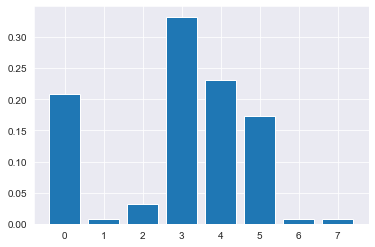

Feature Names: 


In [37]:
scores = []
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    scores.append(v)
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#add features and combine
#print("Feature Names: ")
features = []
algx = x.drop(columns = ['New Deaths'])
for col in algx.columns:
    features.append(col)
    
dffeats = pd.DataFrame({'Feature Names':features})

dfscores = pd.DataFrame({'Scores':scores})
dffs = pd.concat([dffeats, dfscores], axis=1)
dffs.to_csv(r'C:\Users\Mubby\OneDrive - University of Kentucky\DOCS\SPRING 2022\DS 711\Capstone python/FeatureImportance.csv', index = False)
dffs

In [28]:
dffs

,Feature Names,Scores
0,Population,0.208208
1,Lat,0.007549
2,Long,0.032491
3,temp,0.332609
4,humidity,0.230905
5,windspeed,0.172968
6,Age-65,0.008126
7,Income-PC,0.007144
